In [25]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import scipy as sp
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [26]:
rawData = pd.read_csv('../00. Data/train_prob-2.csv')
rawData

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,267387,A,B,B,C,B,B,A,E,G,...,0.22443,0.69220,0.30912,0.47134,0.53290,0.97139,0.59414,0.36856,0.42951,8.13741
1,410037,A,A,A,A,B,B,A,E,C,...,0.43278,0.97199,0.62596,0.40193,0.49181,0.56479,0.39386,0.36247,0.71541,7.40427
2,139373,A,A,B,A,B,B,A,E,C,...,0.36238,0.41310,0.27010,0.40112,0.53052,0.35635,0.33341,0.33354,0.82542,7.98022
3,113765,A,A,A,C,B,B,A,E,C,...,0.32670,0.42301,0.28331,0.46425,0.38302,0.38054,0.68827,0.34895,0.73375,7.26085
4,179915,A,B,A,C,B,B,A,E,E,...,0.20121,0.37466,0.46316,0.75578,0.55676,0.31308,0.43157,0.32302,0.18028,7.26448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,320975,A,A,A,C,B,B,A,E,C,...,0.61484,0.40968,0.62906,0.31427,0.43718,0.40494,0.69718,0.34519,0.67524,7.60537
239996,29591,A,B,A,C,B,B,A,E,C,...,0.83770,0.74914,0.82530,0.46395,0.83396,0.71724,0.69450,0.33008,0.28460,8.10343
239997,46717,A,B,B,C,B,D,A,E,G,...,0.90443,0.47447,0.79777,0.87541,0.63918,0.58994,0.77751,0.86388,0.74568,6.93285
239998,463191,A,A,A,C,B,D,A,E,E,...,0.25044,0.21360,0.22158,0.06595,0.61991,0.62167,0.25545,0.33329,0.28366,6.64854


In [27]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 26 columns):
id        240000 non-null int64
cat0      240000 non-null object
cat1      240000 non-null object
cat2      240000 non-null object
cat3      240000 non-null object
cat4      240000 non-null object
cat5      240000 non-null object
cat6      240000 non-null object
cat7      240000 non-null object
cat8      240000 non-null object
cat9      240000 non-null object
cont0     240000 non-null float64
cont1     240000 non-null float64
cont2     240000 non-null float64
cont3     240000 non-null float64
cont4     240000 non-null float64
cont5     240000 non-null float64
cont6     240000 non-null float64
cont7     240000 non-null float64
cont8     240000 non-null float64
cont9     240000 non-null float64
cont10    240000 non-null float64
cont11    240000 non-null float64
cont12    240000 non-null float64
cont13    240000 non-null float64
target    240000 non-null float64
dtypes: float64(1

# 전처리

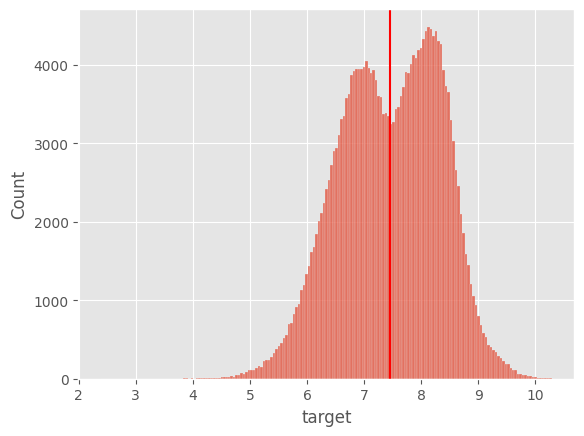

In [28]:
sns.histplot( data=rawData, x='target' )
plt.axvline( 7.45, c='red' )
plt.show()

## 단계 1

In [29]:
rawData['target_A'] = rawData.target <= 7.45
rawData.target_A.value_counts()

False    123538
True     116462
Name: target_A, dtype: int64

## 단계 2

In [30]:
rawData.select_dtypes('object').apply( lambda x : list(np.sort(x.unique())) )

cat0                                           [A, B]
cat1                                           [A, B]
cat2                                           [A, B]
cat3                                     [A, B, C, D]
cat4                                     [A, B, C, D]
cat5                                     [A, B, C, D]
cat6                         [A, B, C, D, E, G, H, I]
cat7                         [A, B, C, D, E, F, G, I]
cat8                            [A, B, C, D, E, F, G]
cat9    [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O]
dtype: object

In [31]:
rawData.cat3.value_counts()

C    146860
A     83634
D      9005
B       501
Name: cat3, dtype: int64

In [32]:
rawData.cat3.map({'B':'C', 'C':'C', 'A':'A', 'D':'D'})

0         C
1         A
2         A
3         C
4         C
         ..
239995    C
239996    C
239997    C
239998    C
239999    C
Name: cat3, Length: 240000, dtype: object

In [33]:
rawData.cat3 = rawData.cat3.replace({ 'B':'C' })
rawData.cat4 = rawData.cat4.replace({ 'A':'B', 'D':'B' })
rawData.cat6 = rawData.cat6.replace({ 'D':'A', 'E':'B', 'G':'C', 'H':'B', 'I':'A' })
rawData.cat7 = rawData.cat7.replace({ 'A':'B', 'C':'B', 'F':'D', 'I':'B' })

In [34]:
rawData.select_dtypes('object').apply( lambda x : list(np.sort(x.unique())) )

cat0                                           [A, B]
cat1                                           [A, B]
cat2                                           [A, B]
cat3                                        [A, C, D]
cat4                                           [B, C]
cat5                                     [A, B, C, D]
cat6                                        [A, B, C]
cat7                                     [B, D, E, G]
cat8                            [A, B, C, D, E, F, G]
cat9    [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O]
dtype: object

In [35]:
basetable = rawData.copy()

# 문제 1

## 단계 1

In [36]:
prob1 = basetable.copy()

In [37]:
prob1['cat_c'] = prob1.select_dtypes('object').apply( lambda x : ''.join(list(x)), axis=1 )
prob1

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,target_A,cat_c
0,267387,A,B,B,C,B,B,A,E,G,...,0.30912,0.47134,0.53290,0.97139,0.59414,0.36856,0.42951,8.13741,False,ABBCBBAEGG
1,410037,A,A,A,A,B,B,A,E,C,...,0.62596,0.40193,0.49181,0.56479,0.39386,0.36247,0.71541,7.40427,True,AAAABBAECF
2,139373,A,A,B,A,B,B,A,E,C,...,0.27010,0.40112,0.53052,0.35635,0.33341,0.33354,0.82542,7.98022,False,AABABBAECJ
3,113765,A,A,A,C,B,B,A,E,C,...,0.28331,0.46425,0.38302,0.38054,0.68827,0.34895,0.73375,7.26085,True,AAACBBAECG
4,179915,A,B,A,C,B,B,A,E,E,...,0.46316,0.75578,0.55676,0.31308,0.43157,0.32302,0.18028,7.26448,True,ABACBBAEEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,320975,A,A,A,C,B,B,A,E,C,...,0.62906,0.31427,0.43718,0.40494,0.69718,0.34519,0.67524,7.60537,False,AAACBBAECI
239996,29591,A,B,A,C,B,B,A,E,C,...,0.82530,0.46395,0.83396,0.71724,0.69450,0.33008,0.28460,8.10343,False,ABACBBAECF
239997,46717,A,B,B,C,B,D,A,E,G,...,0.79777,0.87541,0.63918,0.58994,0.77751,0.86388,0.74568,6.93285,True,ABBCBDAEGF
239998,463191,A,A,A,C,B,D,A,E,E,...,0.22158,0.06595,0.61991,0.62167,0.25545,0.33329,0.28366,6.64854,True,AAACBDAEEF


In [38]:
prob1.cat_c.value_counts()

AAAABBAECF    6507
AAAABDAECF    5915
ABACBBAEEL    4354
AAACBBAECF    4145
AAACBDAECF    3636
              ... 
ABAABAADAI       1
ABBCBCAEEM       1
AAACBDABCM       1
AAAABDAECD       1
AABABABEGI       1
Name: cat_c, Length: 7214, dtype: int64

## 단계 2

In [39]:
prob1.groupby('cat_c').filter( lambda x : len(x) >= 50 )\
    .groupby('cat_c').apply( lambda x : sps.kstest( sps.zscore(x['target']), sps.norm.cdf) )
#     .groupby('cat_c').apply( lambda x : sps.kstest( (x['target'] - x['target'].mean()) / x['target'].std(), sps.norm.cdf))
    

cat_c
AAAABBADAF     (0.09376572439440634, 0.5473421527428717)
AAAABBADCF    (0.07563373871938084, 0.09808866357260393)
AAAABBADCI      (0.08664425576778845, 0.681076482260107)
AAAABBADEF      (0.0939101952909735, 0.5823502240436164)
AAAABBAEAA    (0.051946000795954045, 0.9127704403880821)
                                 ...                    
BBACBDAECF     (0.07598980539982758, 0.6026179407055587)
BBACBDAEEF       (0.0859800030322877, 0.581358398292319)
BBACBDAEEI     (0.10940919396299809, 0.4696165303367613)
BBACBDAEEL     (0.08931329185786396, 0.5093917400236871)
BBACBDAEGF     (0.06786143231889008, 0.8619567103732289)
Length: 625, dtype: object

In [40]:
result = prob1.groupby('cat_c').filter( lambda x : len(x) >= 50 )\
    .groupby('cat_c').apply( lambda x : pd.Series(sps.kstest( sps.zscore(x['target']), sps.norm.cdf), index=['stats', 'pvalue'] ) )\
    .join( prob1['cat_c'].value_counts().rename('cnt') )\
    .sort_values( ['cnt', 'pvalue'], ascending=[False, True] )
result

,stats,pvalue,cnt
cat_c,,,
AAAABBAECF,0.060870,2.115109e-21,6507
AAAABDAECF,0.089311,1.671599e-41,5915
ABACBBAEEL,0.051812,1.343414e-10,4354
AAACBBAECF,0.053657,8.203372e-11,4145
AAACBDAECF,0.077964,1.140213e-19,3636
...,...,...,...
ABAABDAEEA,0.084402,8.390117e-01,50
ABBCBDAEEM,0.079997,8.808641e-01,50
AAACBCAEEI,0.074002,9.282049e-01,50


In [41]:
cat_c_A = result[ result.pvalue > 0.05 ].iloc[:3]
cat_c_A

,stats,pvalue,cnt
cat_c,,,
AAAABBAEEI,0.039175,0.120343,907
AAACBDAEGI,0.044795,0.056755,880
AAACBBAEEA,0.046192,0.059827,815


In [42]:
cat_c_B = result[ result.pvalue > 0.05 ].iloc[-3:]
cat_c_B

,stats,pvalue,cnt
cat_c,,,
AAACBCAEEI,0.074002,0.928205,50
ABADBDAEAL,0.069456,0.955589,50
ABBABBAECI,0.049759,0.999096,50


## 단계 3

In [43]:
cat_c_A.index

Index(['AAAABBAEEI', 'AAACBDAEGI', 'AAACBBAEEA'], dtype='object', name='cat_c')

In [44]:
A, a_pvalue = sps.bartlett(
    prob1.loc[ prob1.cat_c == 'AAAABBAEEI', 'target' ],
    prob1.loc[ prob1.cat_c == 'AAACBDAEGI', 'target' ],
    prob1.loc[ prob1.cat_c == 'AAACBBAEEA', 'target' ]
)
print( A, a_pvalue )

17.1386942430748 0.00018983654955634903


In [45]:
cat_c_B.index

Index(['AAACBCAEEI', 'ABADBDAEAL', 'ABBABBAECI'], dtype='object', name='cat_c')

In [46]:
B, b_pvalue = sps.bartlett(
    prob1.loc[ prob1.cat_c == 'AAACBCAEEI', 'target' ],
    prob1.loc[ prob1.cat_c == 'ABADBDAEAL', 'target' ],
    prob1.loc[ prob1.cat_c == 'ABBABBAECI', 'target' ]
)
print( B, b_pvalue )

3.029195367489878 0.21989663504480444


## 단계 4

In [47]:
_, C = sps.f_oneway(
    prob1.loc[ prob1.cat_c == 'AAACBCAEEI', 'target' ],
    prob1.loc[ prob1.cat_c == 'ABADBDAEAL', 'target' ],
    prob1.loc[ prob1.cat_c == 'ABBABBAECI', 'target' ]
)
C

0.07849494896709325

In [48]:
round( A + B + C, 3 )

20.246

# 문제 2

## 단계 1

In [53]:
cols = basetable.loc[:, 'cont0':'cont13'].columns
cols
# basetable.select_dtypes('number')

Index(['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13'],
      dtype='object')

In [55]:
corr = basetable[ cols ].corr()
corr

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
cont0,1.000000,-0.123344,-0.268621,0.255262,-0.108197,0.573894,0.301672,0.300353,0.579618,0.524481,0.394401,0.425350,0.473249,0.039613
cont1,-0.123344,1.000000,0.174625,-0.153110,-0.035455,-0.064297,0.099449,-0.091482,-0.105811,-0.035944,0.070926,0.060877,-0.080143,-0.034036
cont2,-0.268621,0.174625,1.000000,-0.216238,0.047065,-0.291732,-0.050488,-0.213688,-0.278496,-0.227655,-0.071688,-0.107875,-0.329195,-0.054582
cont3,0.255262,-0.153110,-0.216238,1.000000,-0.048677,0.253592,0.059515,0.215057,0.264717,0.220375,0.099694,0.131967,0.253720,0.043121
cont4,-0.108197,-0.035455,0.047065,-0.048677,1.000000,-0.166160,-0.175280,-0.105320,-0.136829,-0.150984,-0.187024,-0.199560,-0.127953,-0.012127
cont5,0.573894,-0.064297,-0.291732,0.253592,-0.166160,1.000000,0.341552,0.341689,0.606329,0.615449,0.482025,0.509316,0.631540,0.029530
cont6,0.301672,0.099449,-0.050488,0.059515,-0.175280,0.341552,1.000000,0.151666,0.307044,0.381141,0.455662,0.485435,0.246285,0.037730
cont7,0.300353,-0.091482,-0.213688,0.215057,-0.105320,0.341689,0.151666,1.000000,0.334679,0.283921,0.200623,0.228630,0.337916,0.049162
cont8,0.579618,-0.105811,-0.278496,0.264717,-0.136829,0.606329,0.307044,0.334679,1.000000,0.558560,0.413619,0.458089,0.530215,0.047070
cont9,0.524481,-0.035944,-0.227655,0.220375,-0.150984,0.615449,0.381141,0.283921,0.558560,1.000000,0.484661,0.529252,0.538278,0.000957


## 단계 2

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
# 절대값이 1에 가까울 수록 두 변수간의 연관성이 큽니다. 
# 이는 곧 절대값이 1에 가까울 수록 거리 또한 가깝다
dist = corr.applymap( lambda x : 1 - abs(x) )
dist

,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
cont0,0.000000,0.876656,0.731379,0.744738,0.891803,0.426106,0.698328,0.699647,0.420382,0.475519,0.605599,0.574650,0.526751,0.960387
cont1,0.876656,0.000000,0.825375,0.846890,0.964545,0.935703,0.900551,0.908518,0.894189,0.964056,0.929074,0.939123,0.919857,0.965964
cont2,0.731379,0.825375,0.000000,0.783762,0.952935,0.708268,0.949512,0.786312,0.721504,0.772345,0.928312,0.892125,0.670805,0.945418
cont3,0.744738,0.846890,0.783762,0.000000,0.951323,0.746408,0.940485,0.784943,0.735283,0.779625,0.900306,0.868033,0.746280,0.956879
cont4,0.891803,0.964545,0.952935,0.951323,0.000000,0.833840,0.824720,0.894680,0.863171,0.849016,0.812976,0.800440,0.872047,0.987873
cont5,0.426106,0.935703,0.708268,0.746408,0.833840,0.000000,0.658448,0.658311,0.393671,0.384551,0.517975,0.490684,0.368460,0.970470
cont6,0.698328,0.900551,0.949512,0.940485,0.824720,0.658448,0.000000,0.848334,0.692956,0.618859,0.544338,0.514565,0.753715,0.962270
cont7,0.699647,0.908518,0.786312,0.784943,0.894680,0.658311,0.848334,0.000000,0.665321,0.716079,0.799377,0.771370,0.662084,0.950838
cont8,0.420382,0.894189,0.721504,0.735283,0.863171,0.393671,0.692956,0.665321,0.000000,0.441440,0.586381,0.541911,0.469785,0.952930
cont9,0.475519,0.964056,0.772345,0.779625,0.849016,0.384551,0.618859,0.716079,0.441440,0.000000,0.515339,0.470748,0.461722,0.999043


In [59]:
# n_clusters는 None으로 하여 distance_threshold로 군집의 수가 정해지도록
# affinity를 'precomputed'로 해서 거리 행렬
# 문제 조건에서 군집간에 상관도의 평균이 0.5 -> distance_threshold를 0.5로 설정
# linkage를 'average'로 설정하여 두 군집간의 평균 거리를 결합 기준으로 하도록 한다.
cluster = AgglomerativeClustering(
    n_clusters=None,
    affinity='precomputed',
    distance_threshold=0.5,
    linkage='average'
).fit( dist.values )
cluster

AgglomerativeClustering(affinity='precomputed', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0.5,
                        linkage='average', memory=None, n_clusters=None,
                        pooling_func='deprecated')

In [60]:
cluster.labels_

array([0, 5, 6, 4, 7, 0, 8, 2, 0, 0, 1, 1, 0, 3], dtype=int64)

In [67]:
# 단계 5에서 사용하기 위해 미리 확인
# 0이 가장 많고, 이후 PCA 입력변수로 지정
pca_cols = corr.loc[ cluster.labels_ == 0 ].index.values
pca_cols

array(['cont0', 'cont5', 'cont8', 'cont9', 'cont12'], dtype=object)

## 단계 3

In [69]:
prob2 = pd.get_dummies( basetable, drop_first=True )
prob2

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,...,cat9_F,cat9_G,cat9_H,cat9_I,cat9_J,cat9_K,cat9_L,cat9_M,cat9_N,cat9_O
0,267387,0.65226,0.55771,0.25398,0.28196,0.82400,0.22443,0.69220,0.30912,0.47134,...,0,1,0,0,0,0,0,0,0,0
1,410037,0.36970,0.68159,0.30038,0.20156,0.46113,0.43278,0.97199,0.62596,0.40193,...,1,0,0,0,0,0,0,0,0,0
2,139373,0.47881,0.63976,0.40024,0.24153,0.27128,0.36238,0.41310,0.27010,0.40112,...,0,0,0,0,1,0,0,0,0,0
3,113765,0.43438,0.77575,0.54887,0.21935,0.27944,0.32670,0.42301,0.28331,0.46425,...,0,1,0,0,0,0,0,0,0,0
4,179915,0.47866,0.64326,0.37255,0.21004,0.41188,0.20121,0.37466,0.46316,0.75578,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,320975,0.35693,0.76358,0.34284,0.16477,0.28020,0.61484,0.40968,0.62906,0.31427,...,0,0,0,1,0,0,0,0,0,0
239996,29591,0.54301,0.55237,0.32641,0.34687,0.53044,0.83770,0.74914,0.82530,0.46395,...,1,0,0,0,0,0,0,0,0,0
239997,46717,0.88461,0.68996,0.19267,0.79067,0.51930,0.90443,0.47447,0.79777,0.87541,...,1,0,0,0,0,0,0,0,0,0
239998,463191,0.34658,0.66512,0.43276,0.17984,0.33547,0.25044,0.21360,0.22158,0.06595,...,1,0,0,0,0,0,0,0,0,0


## 단계 4

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
prob2_train, prob2_test = train_test_split( prob2, train_size=0.8, random_state=123 )
print( prob2_train.shape, prob2_test.shape )

(192000, 51) (48000, 51)


## 단계 5

In [72]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA( random_state=123 )
pca.fit( prob2_train[pca_cols] )

PCA(copy=True, iterated_power='auto', n_components=None, random_state=123,
    svd_solver='auto', tol=0.0, whiten=False)

In [79]:
np.cumsum( pca.explained_variance_ratio_ )

array([0.65539329, 0.76352231, 0.84693541, 0.92685267, 1.        ])

In [84]:
pca_train = pd.DataFrame( pca.transform( prob2_train[pca_cols] ), 
    columns= [ f'pca{i}' for i in range(len(pca_cols))],
    index=prob2_train.index
)

pca_test = pd.DataFrame( pca.transform( prob2_test[pca_cols] ), 
    columns= [ f'pca{i}' for i in range(len(pca_cols))],
    index=prob2_test.index
)

In [88]:
prob2_train_pca = pd.concat( [prob2_train, pca_train.loc[:, 'pca0':'pca2'] ], axis=1 )
prob2_test_pca = pd.concat( [prob2_test, pca_test.loc[:, 'pca0':'pca2'] ], axis=1 )

In [91]:
prob2_train_pca.columns

Index(['id', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6',
       'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13',
       'target', 'target_A', 'cat0_B', 'cat1_B', 'cat2_B', 'cat3_C', 'cat3_D',
       'cat4_C', 'cat5_B', 'cat5_C', 'cat5_D', 'cat6_B', 'cat6_C', 'cat7_D',
       'cat7_E', 'cat7_G', 'cat8_B', 'cat8_C', 'cat8_D', 'cat8_E', 'cat8_F',
       'cat8_G', 'cat9_B', 'cat9_C', 'cat9_D', 'cat9_E', 'cat9_F', 'cat9_G',
       'cat9_H', 'cat9_I', 'cat9_J', 'cat9_K', 'cat9_L', 'cat9_M', 'cat9_N',
       'cat9_O', 'pca0', 'pca1', 'pca2'],
      dtype='object')